In [4]:
import kwant
import kwant.continuum
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import scipy
from IPython.display import clear_output

%matplotlib notebook
import csv
from numpy import linalg as LA
import matplotlib as mpl
from pylab import *
from matplotlib.collections import LineCollection

In [2]:
def make_system(a0,N_z,N_y,t,E,B,VG,Vb,L_b):

    # system building
    lat = kwant.lattice.square(a=a0, norbs=2)
    syst = kwant.Builder()

    # central scattering region
    for i in range(N_z):
        for j in range(N_y):
            
            # On-site energy
            syst[(lat(j, i))] =np.array([[4*t_e-VG-E_d*(j/length)-E*((j-(length/2))/length)+gap, 0],[ 0, -4*t_h-E_d*(j/length)-VG-E*((j-(length/2))/length)]])
            
            # Hopping in y-direction
            if j > 0:
                syst[lat(j, i), lat(j-1, i)] = np.array([[-t_e, 0.0],[ 0.0, t_h]])

            # Hopping in z-direction
            if i > 0:
                syst[lat(j, i), lat(j , i-1)] = np.array([[-t_e*np.exp(1j*j*B/N_y), 0.0],[ 0.0, t_h*np.exp(1j*j*B/N_y)]])
        
    for i in range(L_b):
        k=i+(N_z-L_b)/2
        syst[(lat(j, k))] = 4*t+Vb-(E*k/N_z)
        
        
        # add leads
    sym_down_lead = kwant.TranslationalSymmetry((0, -a0))
    down_lead = kwant.Builder(sym_down_lead)
    for j in range(N_y):
        down_lead[lat(j, 0)] =np.array([[-4*t_h-V_L+gap+(E/2), 0],[ 0, 4*t_e-V_L+(E/2)]]) 
        if j > 0:
            down_lead[lat(j, 0), lat(j-1, 0)] = np.array([[-t_e, 0.0],[ 0.0, t_h]])
        down_lead[lat(j, 1), lat(j, 0)] =  -t*np.exp(1j*j*B/N_y)#-(t*1j*j*B/N_y)
    syst.attach_lead(down_lead)             
    
    sym_up_lead = kwant.TranslationalSymmetry((0, a0))
    up_lead = kwant.Builder(sym_up_lead)
    for j in range(N_y):
        up_lead[lat(j, 0)] = 4*t-E#-t*((B*j/N_y)**2)
        if j > 0:
            up_lead[lat(j, 0), lat(j-1, 0)] = np.array([[-t_e, 0.0],[ 0.0, t_h]])
        up_lead[lat(j, 1), lat(j, 0)] =  -t*np.exp(1j*j*B/N_y)#-(t*1j*j*B/N_y)
    syst.attach_lead(up_lead)     
    
    return syst

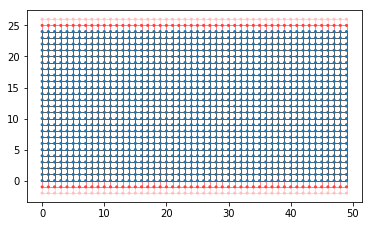

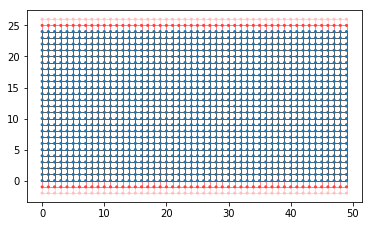

In [3]:
a=1.0
t0=1.0/(a*a)
syst = make_system(a0=a,N_z=25,N_y=50,t=t0,E=0.0,B=0.0,VG=0,Vb=0.0,L_b=0).finalized()
kwant.plot(syst)

In [202]:
a=1.0
t0=1.0/(a*a)

fields = []
data = []
NM = []

fields = np.linspace(0.0,2.0,100)

for field in fields:

    syst = make_system(a0=a,N_z=25,N_y=50,t=t0,E=field,B=0.0,VG=-0.2,Vb=0.5,L_b=1).finalized()

    # compute the scattering matrix at a given energy
    smatrix = kwant.smatrix(syst, 0.1)

    # compute the transmission probability from lead 0 to
    # lead 1
    data.append(smatrix.transmission(1, 0))#/(len(smatrix.lead_info[1].momenta)/2.0))
    NM.append(len(smatrix.lead_info[1].momenta))
    #print (len(smatrix.lead_info[1].momenta))
    
N_modes = len(smatrix.lead_info[1].momenta)
N=int(N_modes/2)
print (N)

N_modes_0 = len(smatrix.lead_info[0].momenta)
N_0=int(N_modes_0/2)
print (N_0)

#print(N,smatrix.lead_info[1].momenta)

26
5


In [5]:
plt.figure()

plt.plot(fields,data,'C0o-')

#plt.yscale('log')
plt.xlabel("E-field [t]")
plt.ylabel("Conductance [$e^2/h$]")
plt.title("N_y=50,N_z=25,V_b=0.5,V_G=0.2,e=0.1")
#plt.legend(['$B=0.0$','$B=0.6$','$B=1.0$' , '$B=1.6$'])
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'fields' is not defined

In [203]:
a=0.5
t0=1.0/(a*a)

fields42 = []
data42 = []
NM = []

fields42 = np.linspace(0.0,2.0,100)

for field in fields42:

    syst = make_system(a0=a,N_z=25*2,N_y=50*2,t=t0,E=field,B=0.0,VG=-0.2,Vb=0.5,L_b=1*2).finalized()

    # compute the scattering matrix at a given energy
    smatrix = kwant.smatrix(syst, 0.1)

    # compute the transmission probability from lead 0 to
    # lead 1
    data42.append(smatrix.transmission(1, 0))#/(len(smatrix.lead_info[1].momenta)/2.0))
    NM.append(len(smatrix.lead_info[1].momenta))
    #print (len(smatrix.lead_info[1].momenta))
    
N_modes = len(smatrix.lead_info[1].momenta)
N=int(N_modes/2)
print (N)

N_modes_0 = len(smatrix.lead_info[0].momenta)
N_0=int(N_modes_0/2)
print (N_0)

#print(N,smatrix.lead_info[1].momenta)

23
5


<IPython.core.display.Javascript object>


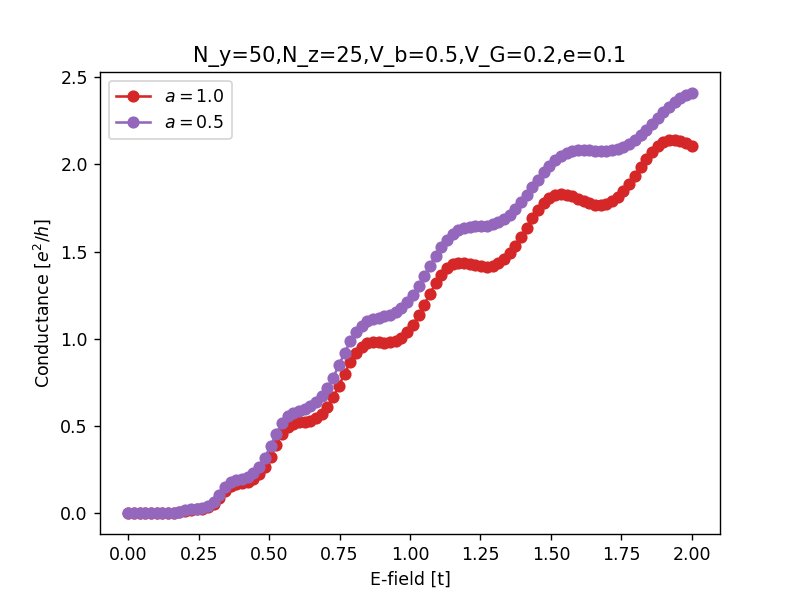

In [204]:
plt.figure()

plt.plot(fields,data,'C3o-')
plt.plot(fields42,data42,'C4o-')

#plt.yscale('log')
plt.xlabel("E-field [t]")
plt.ylabel("Conductance [$e^2/h$]")
plt.title("N_y=50,N_z=25,V_b=0.5,V_G=0.2,e=0.1")
plt.legend(['$a=1.0$','$a=0.5$'])

plt.show()

In [ ]:
a=1.0
t0=1.0/(a*a)

fields = []
data = []
NM = []

fields = np.linspace(0.0,2.0,100)

for field in fields:

    syst = make_system(a0=a,N_z=25,N_y=50,t=t0,E=field,B=0.0,VG=-0.2,Vb=0.5,L_b=1).finalized()

    # compute the scattering matrix at a given energy
    smatrix = kwant.smatrix(syst, 0.1)

    # compute the transmission probability from lead 0 to
    # lead 1
    data.append(smatrix.transmission(1, 0))#/(len(smatrix.lead_info[1].momenta)/2.0))
    NM.append(len(smatrix.lead_info[1].momenta))
    #print (len(smatrix.lead_info[1].momenta))
    
N_modes = len(smatrix.lead_info[1].momenta)
N=int(N_modes/2)
print (N)

N_modes_0 = len(smatrix.lead_info[0].momenta)
N_0=int(N_modes_0/2)
print (N_0)

#print(N,smatrix.lead_info[1].momenta)